In [1]:
import pandas as pd
import numpy as np


from AnalyzeSrc.HandlingMissingData import (
    MissingValueHandler,
    CategoricalMissingFeatureStrategy,
    StatisticalModelImputationStrategy,
    KNNImputationStrategy,
    FillMissingValuesStrategy,
    DropMissingValuesStrategy
)

from AnalyzeSrc.EncodingStrategies import (
    CategoricalFeatureEncoder
)

from AnalyzeSrc.MissingValueAnalysis import SimpleMissingValuesAnalysis

In [2]:
# Load the data
# Assuming you have already extracted the data into the 'Dataset/Extracted/' folder

train_data_path = '../Dataset/Extracted/train.csv'
test_data_path = '../Dataset/Extracted/test.csv'
sample_submission_path = '../Dataset/Extracted/sample_submission.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
sample_submission_df = pd.read_csv(sample_submission_path)

In [3]:
# Step 1: Handle `error_code` missing values as a feature

missing_value_handler = MissingValueHandler(CategoricalMissingFeatureStrategy(
    column_name = 'error_code',
    fill_value = 'No Error'
))

train_df_copy = missing_value_handler.handle_missing_values(train_df)

# Step 2: Encode the categorical features `error_code`

encoder = CategoricalFeatureEncoder(encoding_type='one_hot')
train_df = encoder.encode_feature(train_df, 'error_code')
train_df.drop('error_code_is_missing', axis = 1, inplace=True)

# Step 3: Encode the installation type
encoder = CategoricalFeatureEncoder(encoding_type='one_hot')
train_df = encoder.encode_feature(train_df, 'installation_type')

# Step 4: Impute numerical feature missing values
missing_value_handler.set_strategy(StatisticalModelImputationStrategy(
        model_type='catboost',
        iterations=100,
        learning_rate=0.1
    ))

columns_to_clean = ['temperature', 'irradiance', 'panel_age', 'maintenance_count', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage']

train_df = missing_value_handler.handle_missing_values(train_df, columns=columns_to_clean)

print('\nCatBoost Imputed DataFrame:')
print(train_df[columns_to_clean].describe())
train_df


2025-06-03 21:24:26,696 - INFO - Executing missing value handling strategy.
2025-06-03 21:24:26,697 - INFO - Handling missing values in categorical column 'error_code' as a feature
2025-06-03 21:24:26,704 - INFO - Created missing indicator feature 'error_code_is_missing'
2025-06-03 21:24:26,706 - INFO - Filled missing values in 'error_code' with 'No Error'
2025-06-03 21:24:26,757 - INFO - Switching missing value handling strategy.
2025-06-03 21:24:26,759 - INFO - Executing missing value handling strategy.
2025-06-03 21:24:26,760 - INFO - Imputing missing values using catboost model
2025-06-03 21:24:27,596 - INFO - Imputed missing values for column temperature
2025-06-03 21:24:28,355 - INFO - Imputed missing values for column irradiance
2025-06-03 21:24:29,070 - INFO - Imputed missing values for column panel_age
2025-06-03 21:24:29,973 - INFO - Imputed missing values for column maintenance_count
2025-06-03 21:24:30,880 - INFO - Imputed missing values for column soiling_ratio
2025-06-03 


CatBoost Imputed DataFrame:
        temperature    irradiance     panel_age  maintenance_count  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean      25.082945    501.313463     17.508891           4.012507   
std       12.434389    246.208595      9.840266           1.950557   
min        0.000000   -597.278646      0.001264           0.000000   
25%       16.887350    339.101457      9.238113           3.000000   
50%       24.748804    498.723676     17.485972           4.000000   
75%       32.834064    662.657362     25.832048           5.000000   
max      147.394168   1537.810349     34.998379          15.000000   

       soiling_ratio       voltage       current  module_temperature  \
count   20000.000000  20000.000000  20000.000000        20000.000000   
mean        0.698885     16.227052      1.713331           29.915974   
std         0.167862     17.467730      1.130691           12.086806   
min         0.400149      0.000000      0.000054    

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,pressure,string_id,efficiency,error_code_E00,error_code_E01,error_code_E02,installation_type_is_missing,installation_type_dual-axis,installation_type_fixed,installation_type_tracking
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,...,1018.8665053152533,A1,0.562096,0.0,0.0,0.0,1,0.0,0.0,0.0
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,...,1025.6238537572883,D4,0.396447,1.0,0.0,0.0,0,1.0,0.0,0.0
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,...,1010.9226539809573,C3,0.573776,1.0,0.0,0.0,1,0.0,0.0,0.0
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,...,1021.8466633134253,A1,0.629009,0.0,0.0,0.0,0,1.0,0.0,0.0
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,...,1008.5559577591927,B2,0.341874,1.0,0.0,0.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,604.005659,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,...,1018.3744670739436,B2,0.664907,0.0,0.0,1.0,0,0.0,0.0,1.0
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,...,1016.081102065643,D4,0.354070,1.0,0.0,0.0,0,0.0,1.0,0.0
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,...,1009.6844614602336,D4,0.419734,0.0,0.0,0.0,0,0.0,0.0,1.0
19998,19998,16.996227,632.760700,43.01470184078199,19.063517,4.0,0.688230,0.000000,1.068906,21.149351,...,1006.6738746072241,A1,0.661963,1.0,0.0,0.0,0,0.0,0.0,1.0


In [4]:
# Feature Selection

In [5]:
train_df['power'] = train_df['voltage'] * train_df['current']
train_df['area'] = train_df['power'] / train_df['efficiency']


Missing Values Count by Column:
area    169
dtype: int64

Visualizing Missing Values...


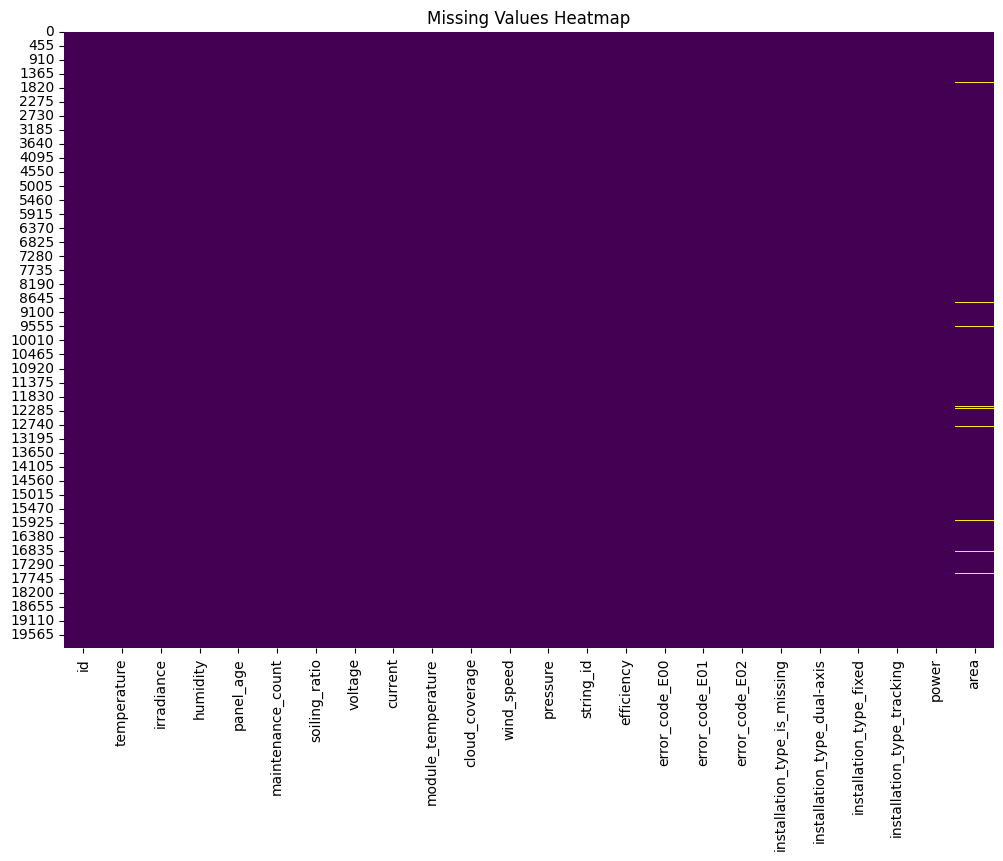

In [6]:
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(train_df)